#   Practical session on Support Vector Machines (SVM)
( notebook initially created by Judith Abecassis (http://members.cbio.mines-paristech.fr/~jabecassi), Chloé Azencott (http://cazencott.info) and Benoit Playe (http://cbio.ensmp.fr/~bplaye), all 3 from the Center for Computational Biology of MINES ParisTech )

<b>All this notebok is using the simple and very well-known <a href=http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html>"Iris" classification dataset</a>, which contains 150 examples (each with 4 numeric attributes) equally distributed in 3 classes.</b>


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
# importer les données
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# afficher la description de la base de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# iris.feature_names[]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### LINEAR SVM
We first restrict ourselves to two of the three classes: setosa et virginica, and  (for visualization purposes) to only 2 of the 4 features/attributes: sepal length and sepal width. We are going to train a linear SVM, and display the obtained separating hyperplane (a straight line, since we for the moment work in 2D input space). 

We will use the [SVC class](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from the svm module of scikit-learn. **As usual, you should first browse the documentation (here of SVC class) in order to understand well how SVC works, and what are its hyper-parameters.**

In [4]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target!=1, :2]
print(X.shape)
y = iris.target[iris.target!=1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

#### Let's plot the separating hyperplane

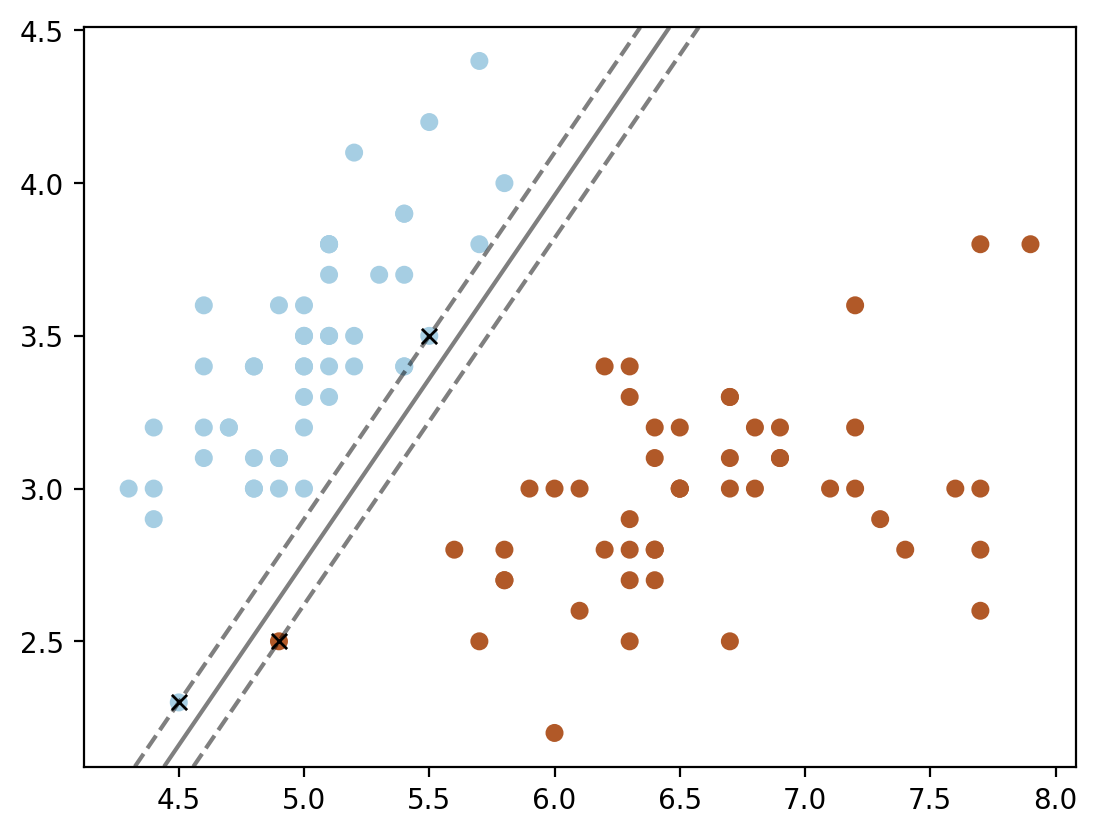

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question:__ Where are located the support vectors?

__Answer:__ The support vectors are the cross located on the margins.  

#### Let us evaluate the performance of the learnt predictor

In [6]:
print(clf.score(X, y))

1.0


__Question:__ What is the performance metric computed by `clf.score`? Please refer to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). What is the meaning if the permormance value is equal to 1.0 ?

__Answer:__ It's the accuracy on the given set in parameters. Here we computed the accuracy on the data on which the classifiers trained. 
If it's equal to zero, it means that the model doesn't make any classification error.

Now, let us consider the *Versicolor* class (instead of Setosa), and still the Virginica class.

In [7]:
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target!=0, :2]
print(X.shape)
y = iris.target[iris.target!=0]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

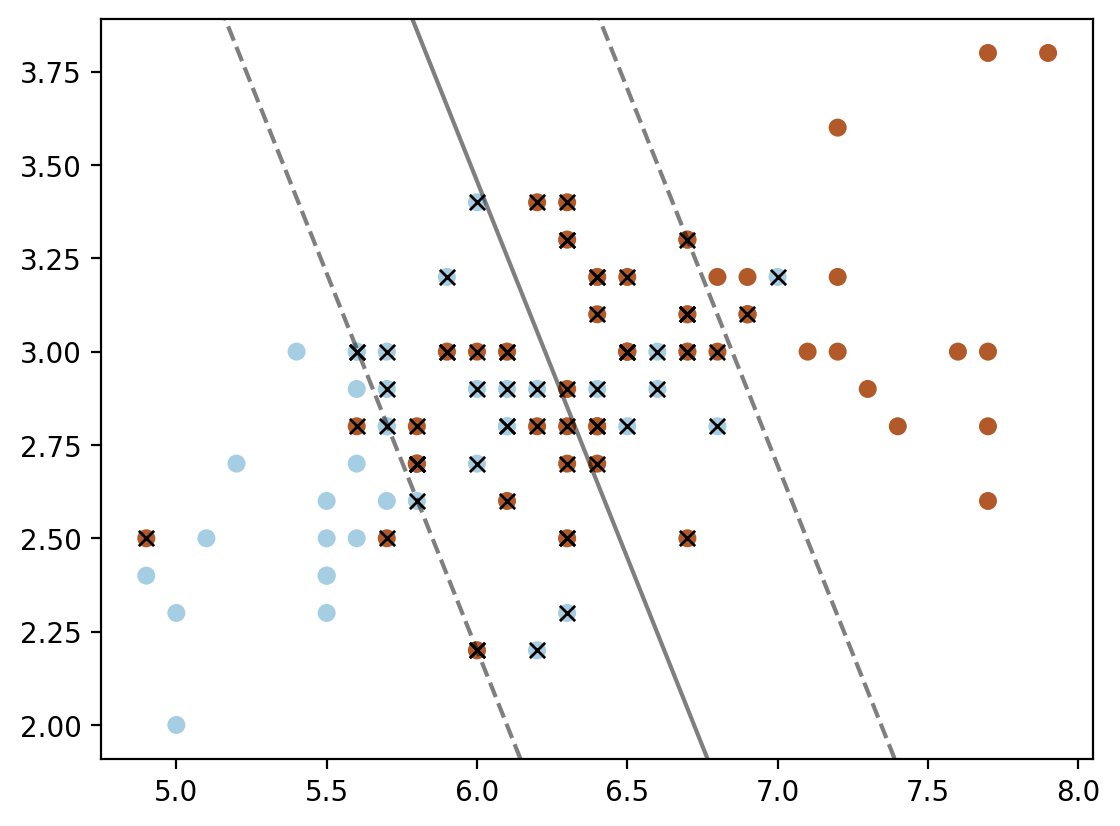

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

In [9]:
clf.support_vectors_.shape

(67, 2)

__Question:__ Where are located the support vectors?

__Answer:__ From the plot, the support vectors are the points that lie directly on the dashed lines.

Now, let us check the performance of the obtained linear SVM on this problem

In [10]:
print(clf.score(X, y))

0.73


The performance is not so good: only ~0.7. We should therefore try to use a NON-LINEAR kernel, in order to obtain a more complex separating boundary that could be better adapted to the data.

### SVM with NON-LINEAR kernel

We will use a Gaussian kernel (named 'rbf' in Scikit-Learn) SVC class, but should try different values for the gamma parameter. As seen during the lecture, the Gaussian kernel formula is:  
$k(x, x') = \frac{1}{\sqrt{2 \pi}} \exp\frac{-||x - x'||^2}{2 \sigma^2}$. 

__Question:__ What does the gamma parameter of Gaussian SVC (i.e. with 'rbf' kernel) correspond to (in equation above, and functionnally)?

__Answer:__ Gamma is the standard deviation of the Gaussian function, it dictates the size and the shape of the area of boundary.

In [11]:
# Values to be tested for gamma
gamma_range = np.linspace(0.1, 50, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X, y)
    print("gamma: %.2f" % param, "score: %.2f" % clf.score(X, y))

gamma: 0.10 score: 0.68
gamma: 2.73 score: 0.73
gamma: 5.35 score: 0.69
gamma: 7.98 score: 0.70
gamma: 10.61 score: 0.71
gamma: 13.23 score: 0.76
gamma: 15.86 score: 0.76
gamma: 18.48 score: 0.76
gamma: 21.11 score: 0.76
gamma: 23.74 score: 0.78
gamma: 26.36 score: 0.78
gamma: 28.99 score: 0.78
gamma: 31.62 score: 0.78
gamma: 34.24 score: 0.79
gamma: 36.87 score: 0.80
gamma: 39.49 score: 0.80
gamma: 42.12 score: 0.80
gamma: 44.75 score: 0.80
gamma: 47.37 score: 0.80
gamma: 50.00 score: 0.80


__Question:__ Now display the separating boundary for the last of these classifiers, which has a score of ~0.8 (therefore a much better model than the linea SVM model).

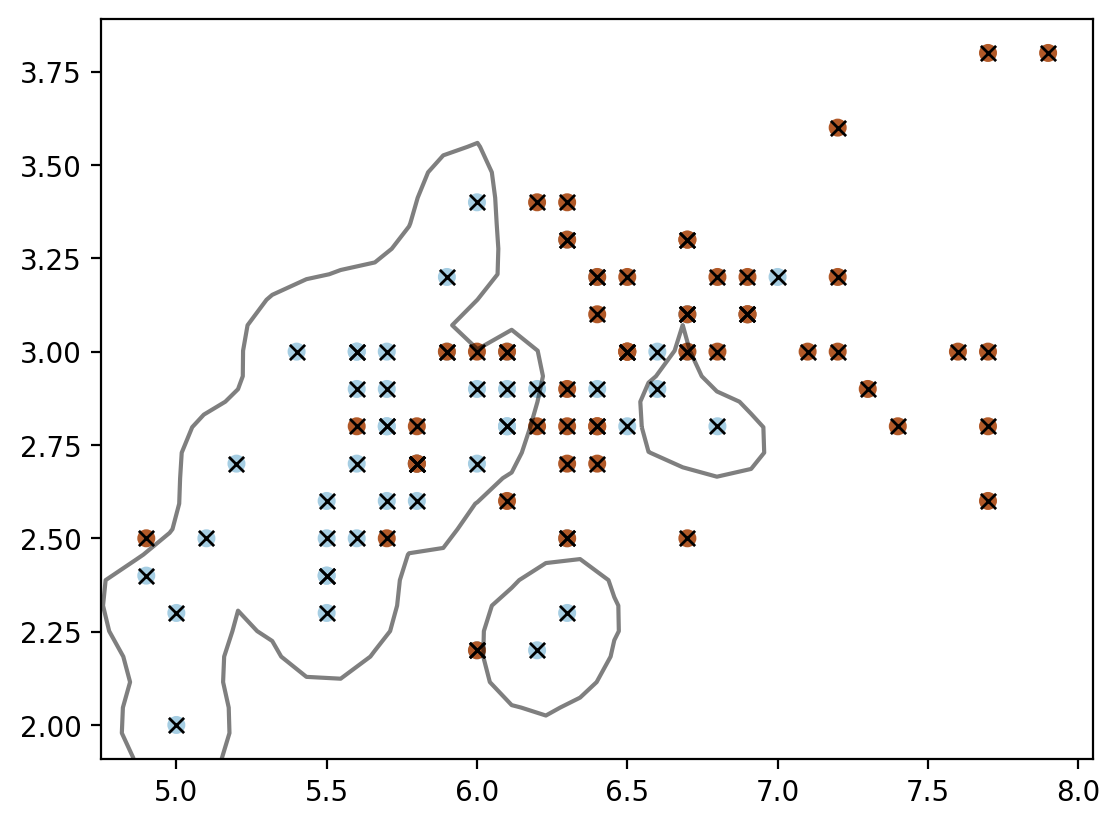

In [12]:
# Answer: [code to be inserted below]
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0, 1], alpha=0.5,
           linestyles=['--', '-','--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

In [13]:
clf.support_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
X.shape

(100, 2)

__Question:__ Which are the support vectors? Do you think the model shall generalize well (and why)?

__Answer:__ As we can't see the decision boundary, we don't know which ones are the support vectors. Thus it means that the model doesn't generalize well because of the gamma value which is high, it creates a more complex decision boundary which often leads to overfitting.

In order to check if the model __generalizes__ well, we need to apply it on new data examples that have NOT been used for training the classifier. 

To this end, we will separate the data in two: a __training set__ and a __test set__. We will train our SVMs on only the training set, and measure the performance on only the test set. The test set, because it was not used during training, plays the role of future new data. For the splitting, we shall use the `train_test_split` function of scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

acc_train, acc_test = list(), list()
for param in np.linspace(0.1, 50, 20):
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

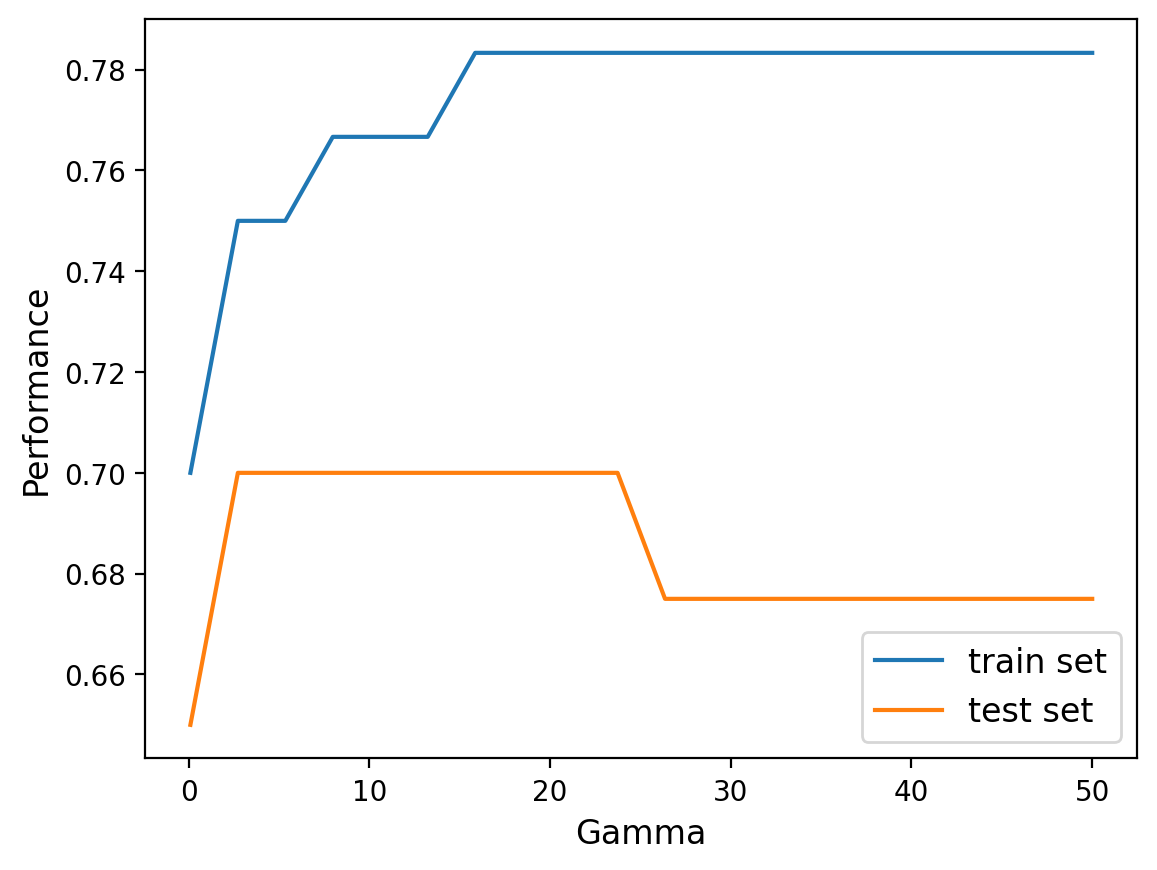

In [16]:
# Plot the traing AND test scores, for each value of gamma hyper-parameter
plt.plot(np.linspace(0.1, 50, 20), acc_train, label='train set')
plt.plot(np.linspace(0.1, 50, 20), acc_test, label='test set')

plt.xlabel("Gamma", fontsize=12)
plt.ylabel("Performance", fontsize=12)

plt.legend(loc='best', fontsize=12)

__Question:__ Do you observe OVER-FITTING? If yes, WHERE? 

__Answer:__ Yes we observe over-fitting when gamma > ~25, as the performance on training set doesn't improve, while the performance on test set is decreasing. 

Given the above graphic, we are tempted to choose a value of 10 or 20 for gamma. But BE CAREFULL! If we select the hyper-parameter value which works best on TEST set, it implies that we will have used information from the test set during training, so the performance estimation on test set might be over-estimated...

In order to avoid this, it is necessary to choose the best gamma value rather by __cross-validation__ applied to the TRAINING set. For this, we shall use the [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class from the model_selection module of scikit-learn.

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameters and values to be tested
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters)

# Now, run cross-validation on the TRAINING set
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

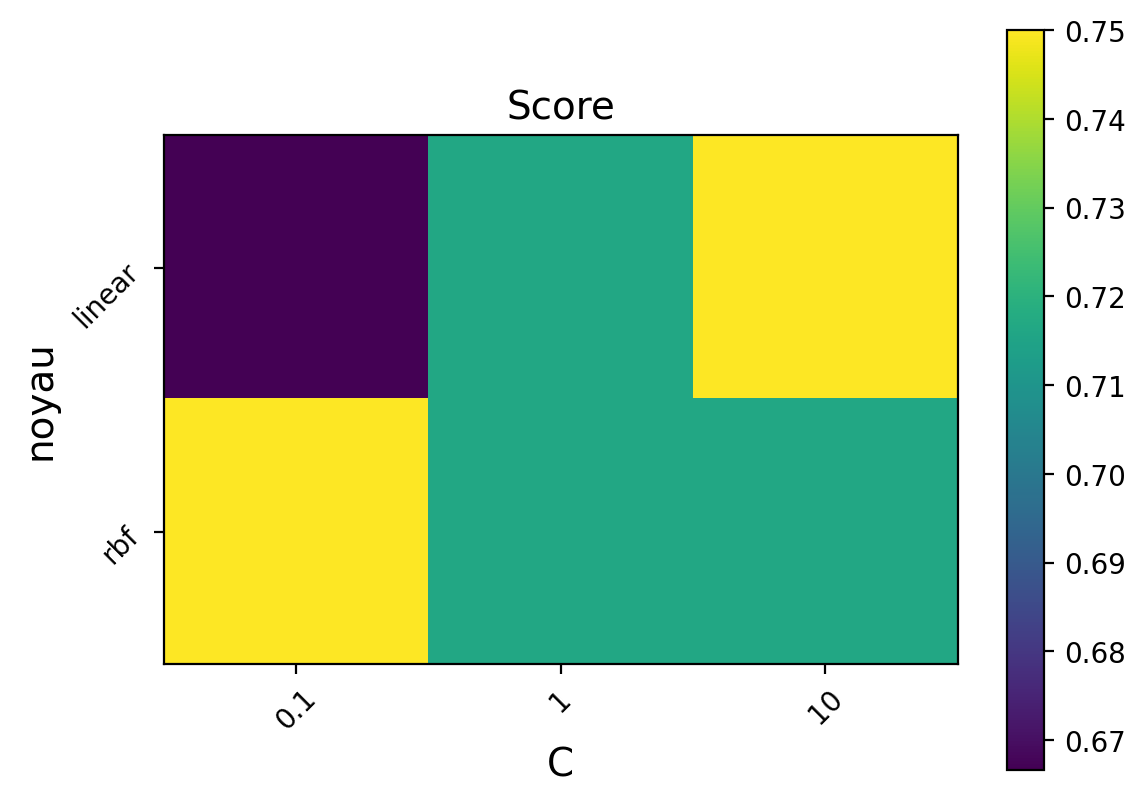

In [18]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

__Question:__ What is the role of the hyper-parameter C? What do you observ when C is large? 

__Answer:__ C is the regularization parameter, it penalizes the model to prevent it from overfitting. When C is large we have better performance.

### Wrap-up: now, write below the codes for finding best SVM hyper-parameters, when using ALL 4 features/attributes:

__Question:__ Train, with CROSS-VALIDATION, a classification SVM to separate classes on the 2 different problems setosa_vs_virginica, then versicolor_vs_virginica. 

What performances obtain your optimal SVMs on the TEST set?

##### 1) Setosa vs virginica

1.0

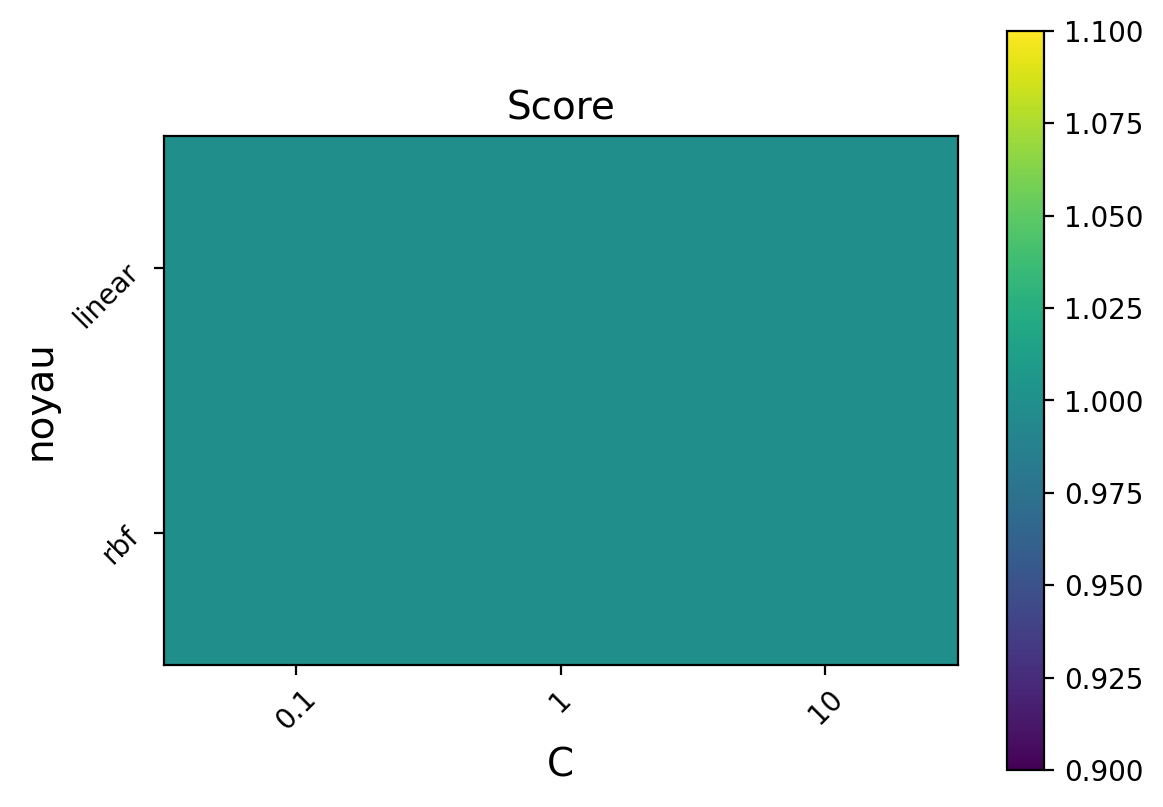

In [19]:
# Answer
from sklearn.metrics import accuracy_score
X = iris.data[iris.target != 1]
y = iris.target[iris.target != 1]

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)
        
svc = svm.SVC()

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

clf = GridSearchCV(svc, parameters)

clf.fit(X_train, y_train)

plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)


##### 2) Versicolour et Virginica

0.9

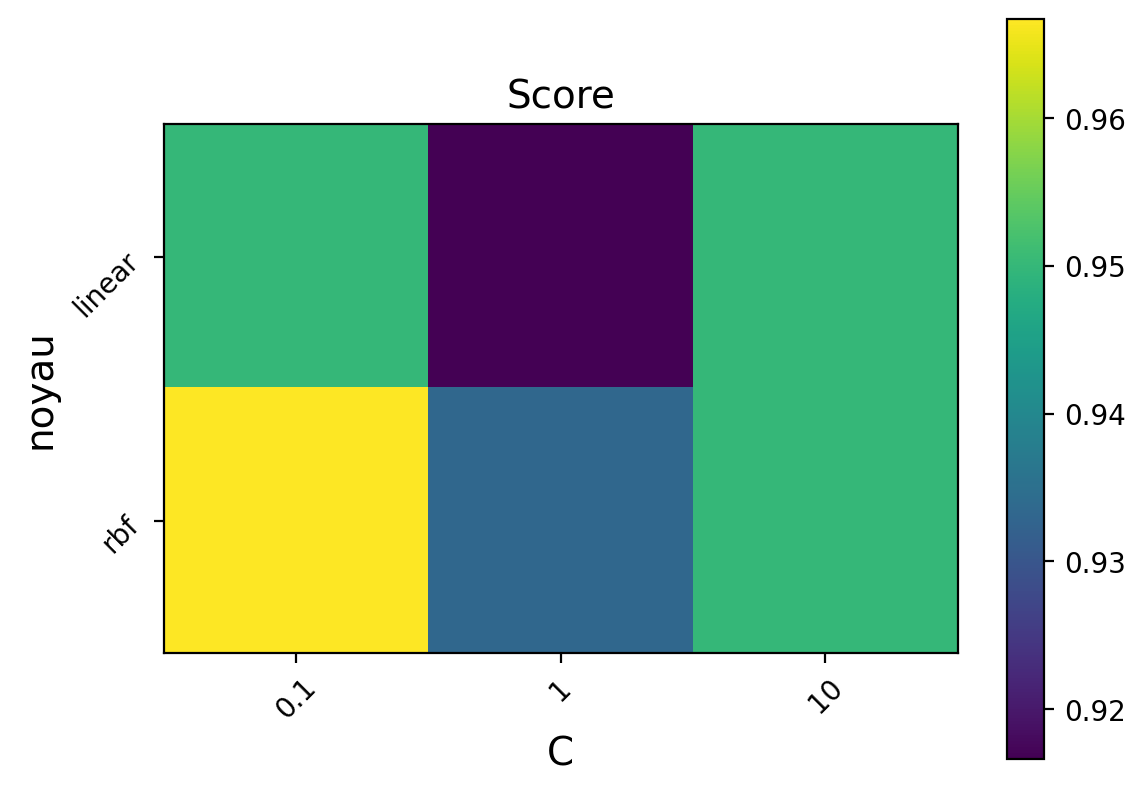

In [20]:
# Answer
# Answer
from sklearn.metrics import accuracy_score
X = iris.data[iris.target != 0]
y = iris.target[iris.target != 0]

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)
        
svc = svm.SVC()

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

clf = GridSearchCV(svc, parameters)

clf.fit(X_train, y_train)

plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

__Question:__ Look into SVC documentation, and explain how it handles MULTI-CLASS problems. *How many different SVMs does SVC learn and combine if there is a total of K classes*? 

__Answer:__ It trains a separate binary SVM classifier for every possible pair of classe (for K classes, the number of SVM learnt and combined is K*(K-1)/2, which is the total number of unique pairs of classes). Each classifier votes for one of the two classes it was trained on, and the class with the majority vote is chosen as the final prediction.


### Assignment #1:  1/ Find (using gridSearch) the best possible SVM (with any kernel type among linear, polynomial or Gaussian) for the COMPLETE dataset (all 3 classes). 2/ For the best SVM model found, compute and display the CONFUSION MATRIX + compute and plot the PRECISION-RECALL CURVES FOR EACH CLASS

NB: for the second question, SEARCH BY YOURSELF INTO THE SciKit-Learn documentation in order to find the corresponding pre-programmed functions.



# Final assignment on SVM 

**Now, use SVM to learn digit recognition on the [*Digits dataset*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py)" (the same that was used at the end of the MLP practical session)**

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 640x480 with 0 Axes>

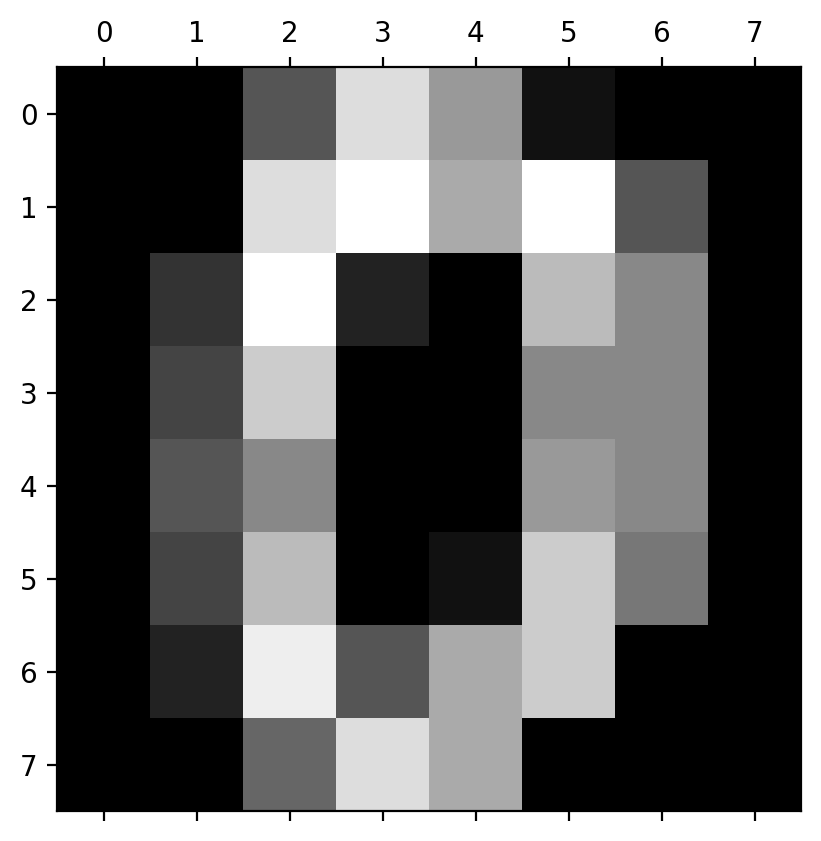

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))


Xdigits = MinMaxScaler().fit_transform(data)
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.2, random_state = 0)


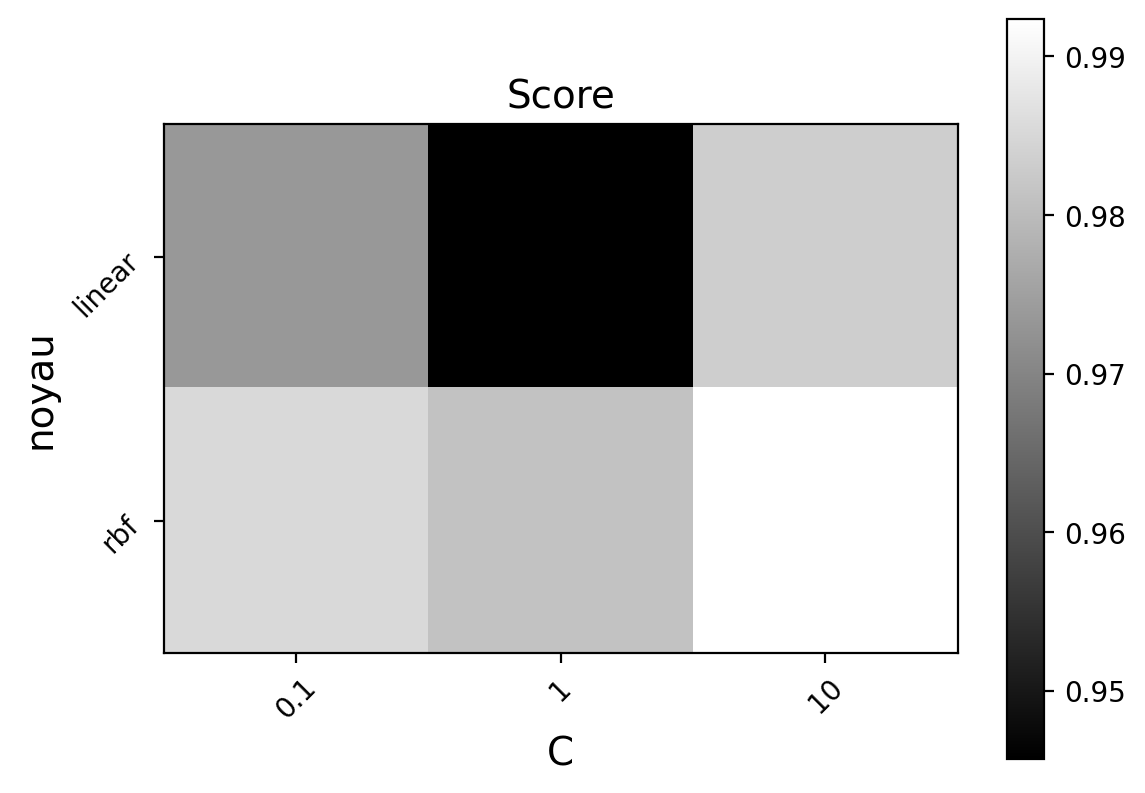

{'C': 10, 'kernel': 'rbf'}


0.9916666666666667

In [25]:
svc = svm.SVC()

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

clf = GridSearchCV(svc, parameters)

clf.fit(Xdigits_train, y_digits_train)

plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()
plt.show()

y_pred = clf.predict(Xdigits_test)
print(clf.best_params_)
accuracy_score(y_digits_test, y_pred)